In [2]:
!pip install sympy --break-system-packages


Defaulting to user installation because normal site-packages is not writeable
  Using cached sympy-1.12.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached sympy-1.12.1-py3-none-any.whl (5.7 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


## Questao densidade de corrente eletrica p2

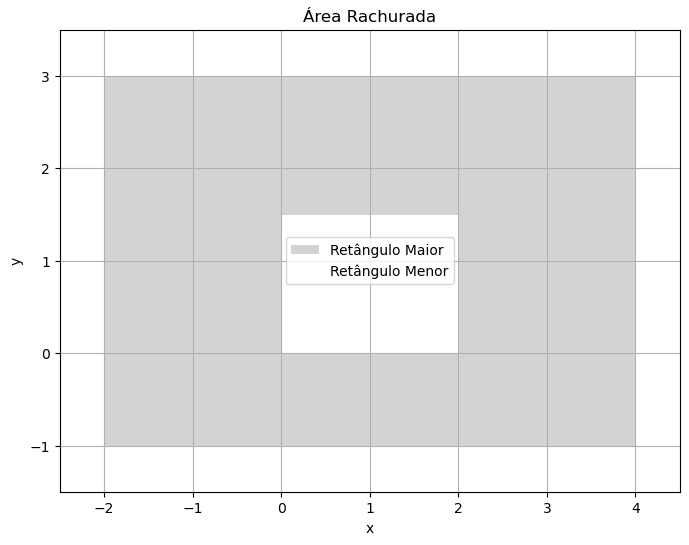

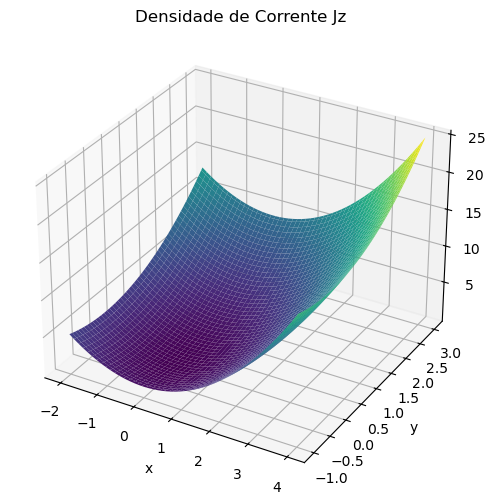

Densidade de corrente Jz = 


(x**2 + y**2)*exp(c*t)



Corrente elétrica total I = 


-b**3*d*exp(c*t)/48 - b*d**3*exp(c*t)/48 + c**3*(a*exp(c*t)/3 + b*exp(c*t)/3) + c*(a**3*exp(c*t)/3 + b**3*exp(c*t)/3) + d**3*(a*exp(c*t)/3 + b*exp(c*t)/3) + d*(a**3*exp(c*t)/3 + b**3*exp(c*t)/3)

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define as variáveis simbólicas
x, y, t, c, a, b, d = sp.symbols("x y t c a b d")

# Define a densidade de corrente Jz
Jz = (x**2 + y**2) * sp.exp(c * t)

# Plota a função Jz para valores específicos de c e t
c_val = 1  # Valor arbitrário para c
t_val = 0  # Valor arbitrário para t

# Plota a figura da área rachurada
a_val = 2
b_val = 4
c_val = 1
d_val = 3

# Cria um grid de pontos para o plot
x_vals = np.linspace(-a_val, b_val, 100)
y_vals = np.linspace(-c_val, d_val, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcula os valores de Jz para o grid de pontos
Jz_vals = sp.lambdify((x, y), Jz.subs({c: c_val, t: t_val}))(X, Y)

plt.figure(figsize=(8, 6))
plt.fill(
    [-a_val, b_val, b_val, -a_val, -a_val],
    [-c_val, -c_val, d_val, d_val, -c_val],
    "lightgray",
    label="Retângulo Maior",
)
plt.fill(
    [0, b_val / 2, b_val / 2, 0, 0],
    [0, 0, d_val / 2, d_val / 2, 0],
    "white",
    label="Retângulo Menor",
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Área Rachurada")
plt.xlim(-a_val - 0.5, b_val + 0.5)
plt.ylim(-c_val - 0.5, d_val + 0.5)
plt.grid(True)
plt.legend()
plt.show()

# Plota a função Jz
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Jz_vals, cmap="viridis")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("Jz")
ax.set_title("Densidade de Corrente Jz")
plt.show()

# Define os limites de integração
x_inf_maior = -a
x_sup_maior = b
y_inf_maior = -c
y_sup_maior = d

x_inf_menor = 0
x_sup_menor = b / 2
y_inf_menor = 0
y_sup_menor = d / 2

# Calcula a integral da área maior
I_maior = sp.integrate(Jz, (x, x_inf_maior, x_sup_maior), (y, y_inf_maior, y_sup_maior))

# Calcula a integral da área menor
I_menor = sp.integrate(Jz, (x, x_inf_menor, x_sup_menor), (y, y_inf_menor, y_sup_menor))

# Calcula a corrente elétrica total
I = I_maior - I_menor

# Imprime a corrente elétrica
print("Densidade de corrente Jz = ")
display(Jz)
print("\n\nCorrente elétrica total I = ", )
I

## Lei de ampare numa solenoide

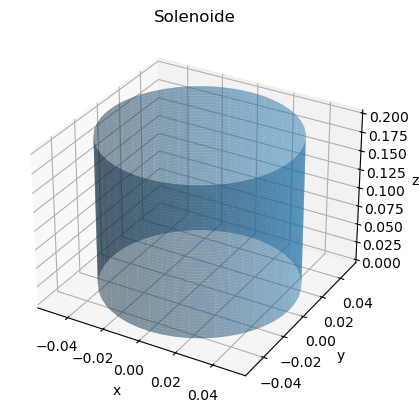

In [10]:
import sympy as sp
from sympy import init_printing
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

init_printing()  # Para exibir as equações em LaTeX


# Definindo as classes
class Solenoide:
    def __init__(self, raio, comprimento, permeabilidade, corrente, num_voltas):
        self.raio = raio
        self.comprimento = comprimento
        self.permeabilidade = permeabilidade
        self.corrente = corrente
        self.num_voltas = num_voltas
        self.mu0 = sp.symbols("mu_0")  # Permeabilidade do vácuo

    def calcular_H(self):
        """Calcula o campo H no centro do solenóide"""
        H = (self.num_voltas * self.corrente) / self.comprimento
        display(sp.Eq(sp.symbols("H"), H * sp.symbols("hat{z}")))
        return H

    def calcular_B(self, H):
        """Calcula o campo B no centro do solenóide"""
        B = self.permeabilidade * H
        display(sp.Eq(sp.symbols("B"), B * sp.symbols("hat{z}")))
        return B

    def calcular_M(self, B, H):
        """Calcula a magnetização M"""
        M = (B - self.mu0 * H) / self.mu0
        display(sp.Eq(sp.symbols("M"), M * sp.symbols("hat{z}")))
        return M

    def calcular_Jm(self):
        """Calcula a densidade de corrente volumétrica Jm"""
        # Jm é 0 pois M é constante
        display(sp.Eq(sp.symbols("J_m"), 0))
        return 0

    def calcular_Km(self):
        """Calcula a densidade de corrente superficial Km"""
        # Km é 0 pois M é paralelo à normal da superfície
        display(sp.Eq(sp.symbols("K_m"), 0))
        return 0

    def plotar_solenoide(self):
        """Plota o solenóide"""
        fig = plt.figure()
        ax = fig.add_subplot(111, projection="3d")

        # Cria os pontos para o cilindro
        z = np.linspace(0, self.comprimento, 50)
        theta = np.linspace(0, 2 * np.pi, 50)
        Z, Theta = np.meshgrid(z, theta)
        X = self.raio * np.cos(Theta)
        Y = self.raio * np.sin(Theta)

        # Plota a superfície do cilindro
        ax.plot_surface(X, Y, Z, alpha=0.5)

        # Define os eixos
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        plt.title("Solenoide")

        plt.show()


#! Definindo os parâmetros do solenóide
raio_solenoide = 0.05  # metros
comprimento_solenoide = 0.2  # metros
permeabilidade_solenoide = 3000 * sp.symbols("mu_0")
corrente_solenoide = 1  # Ampere
num_voltas_solenoide = 100

# Criando o objeto do solenóide
solenoide = Solenoide(
    raio_solenoide,
    comprimento_solenoide,
    permeabilidade_solenoide,
    corrente_solenoide,
    num_voltas_solenoide,
)

# Plotando o solenóide
solenoide.plotar_solenoide()

# Calculando H, B, M, Jm e Km
H = solenoide.calcular_H()
B = solenoide.calcular_B(H)
M = solenoide.calcular_M(B, H)
Jm = solenoide.calcular_Jm()
Km = solenoide.calcular_Km()

## Duas espiras calculando o campo e o torque

In [24]:
import sympy as sp
from sympy import init_printing
    
import numpy as np

init_printing()


# Definindo a classe
class Espira:
    def __init__(self, raio, corrente):
        self.raio = raio
        self.corrente = corrente
        self.mu0 = sp.symbols("mu_0")

    def calcular_campo_magnetico(self, ponto):
        """Calcula o campo magnético no ponto especificado (coordenadas cartesianas)."""
        x, y, z = ponto
        r = sp.sqrt(x**2 + y**2)  # Distância radial no plano xy
        B = (
            (self.mu0 * self.corrente * self.raio**2)
            / (2 * (self.raio**2 + z**2) ** (3 / 2))
            * sp.Matrix([0, 0, 1])
        )
        display(sp.Eq(sp.symbols("B"), B))
        return B

    def calcular_momento_dipolo(self):
        """Calcula o momento de dipolo magnético da espira."""
        mu = self.corrente * sp.pi * self.raio**2 * sp.Matrix([0, 0, 1])
        display(sp.Eq(sp.symbols(r"\vec{\mu}"), mu))
        return mu


# Definindo os parâmetros das espiras
raio_espira1 = 0.1  # metros
corrente_espira1 = 1  # Ampere

raio_espira2 = 0.05  # metros
corrente_espira2 = 2  # Ampere

distancia_espiras = 0.5  # metros

# Criando os objetos das espiras
espira1 = Espira(raio_espira1, corrente_espira1)
espira2 = Espira(raio_espira2, corrente_espira2)

# Ponto P em coordenadas esféricas (r=1000R, θ=π/4, φ=π/2)
r = 1000 * raio_espira2
theta = np.pi / 4
phi = np.pi / 2

# Convertendo as coordenadas esféricas para cartesianas
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)
ponto_P = np.array([x, y, z])

# Calculando o campo magnético da espira 2 no ponto P
B2 = espira2.calcular_campo_magnetico(ponto_P)

# Calculando o torque sobre a espira 2
mu2 = espira2.calcular_momento_dipolo()
B1_centro_espira2 = espira1.calcular_campo_magnetico(
    [0, 0, distancia_espiras]
)  # Campo da espira 1 no centro da espira 2
torque = mu2.cross(B1_centro_espira2)
display(sp.Eq(sp.symbols(r"\vec{\tau}"), torque))

In [22]:
import sympy as sp
from sympy import init_printing
from IPython.display import display

init_printing()


# Definindo a classe
class Dielétricos:
    def __init__(self, er, mr):
        self.er = er
        self.mr = mr
        self.e0 = sp.symbols("epsilon_0")
        self.mu0 = sp.symbols("mu_0")

    def calcular_E2(self, D1):
        """Calcula o campo elétrico E2 na região 2."""
        D2n = D1[1]  # Componente normal de D é contínua
        E2 = (D2n / self.e0) * sp.Matrix([0, 1, 0])
        display(sp.Eq(sp.symbols("E_2"), E2))
        return E2

    def calcular_B2(self, H1):
        """Calcula o campo magnético B2 na região 2."""
        H2t = sp.Matrix([H1[0], H1[2]])  # Componente tangencial de H é contínua
        B2 = self.mu0 * H2t
        display(sp.Eq(sp.symbols("B_2"), B2))
        return B2


# Definindo os parâmetros dos dielétricos
er1 = 2.5
mr1 = 3

# Criando o objeto Dielétricos
dielétricos = Dielétricos(er1, mr1)

# Definindo os campos na região 1
D1 = sp.Matrix([2, -3, 4])
H1 = sp.Matrix([-2, -3, 4])

# Calculando E2 e B2
E2 = dielétricos.calcular_E2(D1)
B2 = dielétricos.calcular_B2(H1)